In [8]:
import pandas as pd
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

# from Models.dataset import load_train_data, load_test_data


In [9]:
def load_train_data(img_size):
    """
    This function loads a dataset of images from a specified path, resizes the images, 
    and stores them in a pandas DataFrame along with their respective classes.

    The images are categorized into four classes: 'MildDemented', 'ModerateDemented', 
    'NonDemented', and 'VeryMildDemented'. The function iterates through each class, 
    opens and resizes the images, and appends them to a dictionary along with their class.

    The dictionary is then converted into a pandas DataFrame and returned.

    Returns:
        df_train (pd.DataFrame): A DataFrame containing the resized images and their classes.
    """
    
    df_train=[] # create a dictionary to store the dataset
    labels=[] # create a list to store the labels

    """# create dataset from the image folder"""

    classes=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
    train_path=''

    for i in classes:
        if i=='MildDemented':
            train_path='../Dataset/train/MildDemented/mildDem'
        elif i=='ModerateDemented':
            train_path='../Dataset/train/ModerateDemented/moderateDem'
        elif i=='NonDemented':
            train_path='../Dataset/train/NonDemented/nonDem'
        else:
            train_path='../Dataset/train/VeryMildDemented/veryMildDem'
        for j in range(100000):
            try:
                img=cv2.imread(f'{train_path}{j}.jpg',cv2.IMREAD_GRAYSCALE)
                df_train.append(cv2.resize(img,(img_size,img_size)).reshape(img_size*img_size))
                labels.append(i)

            except:
                break

    """# save Dataset into a pandas Dataframe"""
    return np.array(df_train),labels

In [10]:
def load_test_data(img_size):
    """
    This function loads a dataset of images from a specified path, resizes the images, 
    and stores them in a pandas DataFrame along with their respective classes.

    The images are categorized into four classes: 'MildDemented', 'ModerateDemented', 
    'NonDemented', and 'VeryMildDemented'. The function iterates through each class, 
    opens and resizes the images, and appends them to a dictionary along with their class.

    The dictionary is then converted into a pandas DataFrame and returned.

    Returns:
        df_train (pd.DataFrame): A DataFrame containing the resized images and their classes.
    """
    
    df_test=[] # create a dictionary to store the dataset
    labels=[] # create a list to store the labels

    """# create dataset from the image folder"""

    classes=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
    test_path=''

    for i in classes:
        if i=='MildDemented':
            test_path='../Dataset/test/MildDemented'
        elif i=='ModerateDemented':
            test_path='../Dataset/test/ModerateDemented'
        elif i=='NonDemented':
            test_path='../Dataset/test/NonDemented'
        else:
            test_path='../Dataset/test/VeryMildDemented'
        for filename in os.listdir(test_path):
            if filename.endswith(".jpg"):
                try:
                    img=cv2.imread(os.path.join(test_path, filename),cv2.IMREAD_GRAYSCALE)
                    df_test.append(cv2.resize(img,(img_size,img_size)).reshape(img_size*img_size))
                    labels.append(i)

                except:
                    break

    """# save Dataset into a pandas Dataframe"""
    return np.array(df_test),labels

In [11]:
img_size=100
df_train,labels=load_train_data(img_size)
df_test,labels_test=load_test_data(img_size)

In [12]:
print(df_train.shape)
print(df_test.shape)
# df_train.head()
df_train=pd.DataFrame(df_train)
df_train['class']=labels
df_test=pd.DataFrame(df_test)
df_test['class']=labels_test

(5121, 10000)
(1279, 10000)


In [13]:
# df_train.head()
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented


In [14]:
X_train,Y_train=df_train.iloc[:,:-1].values,df_train.iloc[:,-1]
X_train=X_train.reshape(X_train.shape[0],img_size,img_size)


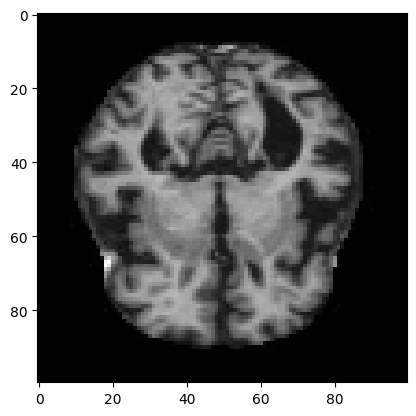

In [15]:
plt.imshow(X_train[0],cmap='gray')

In [16]:
# Divide X_test into validation and test
from sklearn.model_selection import train_test_split
X_test,X_validation,Y_test,Y_validation=train_test_split(df_test.iloc[:,:-1],df_test['class'],test_size=0.2,random_state=42)
X_test=X_test.values.reshape(X_test.shape[0],img_size,img_size)
X_validation=X_validation.values.reshape(X_validation.shape[0],img_size,img_size)

In [10]:
# adaptive mean thresholding
# Initialize an empty array for the denoised images
X_denoise_train = np.empty_like(X_train)
X_denoise_test = np.empty_like(X_test)
X_denoise_val= np.empty_like(X_validation)

# Apply adaptive mean thresholding to each image
for i in range(X_train.shape[0]):
    X_denoise_train[i] = cv2.adaptiveThreshold(X_train[i], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
for i in range(X_test.shape[0]):
    X_denoise_test[i] = cv2.adaptiveThreshold(X_test[i], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
for i in range(X_validation.shape[0]):
    X_denoise_val[i] = cv2.adaptiveThreshold(X_validation[i], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    
X_denoise_train=X_denoise_train.reshape(X_denoise_train.shape[0],img_size,img_size,1)
X_denoise_test=X_denoise_test.reshape(X_denoise_test.shape[0],img_size,img_size,1)
X_denoise_val=X_denoise_val.reshape(X_denoise_val.shape[0],img_size,img_size,1)

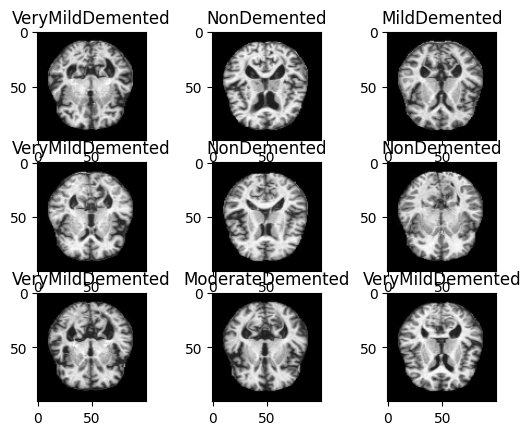

In [17]:
import random
for i in range(0,9):
    j=random.randint(0,X_train.shape[0])
    plt.subplot(330+1+i)
    plt.imshow(X_train[j].reshape(img_size,img_size),cmap=plt.get_cmap('gray'))
    plt.title(Y_train[j])

In [18]:
# encode the target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_train_encoded=le.fit_transform(Y_train)
Y_test_encoded=le.transform(Y_test)
Y_validation_encoded=le.transform(Y_validation)


# Training without 5-Fold CV

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras import regularizers

y_train=to_categorical(Y_train_encoded)
y_test=to_categorical(Y_test_encoded)
y_val=to_categorical(Y_validation_encoded)

model=Sequential()

model.add(Conv2D(32,(5,5),activation='relu',input_shape=(img_size,img_size,1),padding='same')) #f=3,p=1,s=1,c=32
model.add(MaxPooling2D(2,2)) #f=2,s=2

model.add(Conv2D(32,(5,5),activation='relu',padding='same')) #f=3,p=1,s=1,c=32 
# add batch normalisation
model.add(BatchNormalization())
# Add pooling layer
model.add(MaxPooling2D(2,2)) #f=2,s=2
model.add(Conv2D(64,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=64 
model.add(MaxPooling2D(2,2)) #f=2,s=2

model.add(Conv2D(64,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=64 
model.add(MaxPooling2D(2,2)) #f=2,s=2

model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=128
#Add pooling layer
model.add(MaxPooling2D(2,2)) #f=2,s=2
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer=Adam(lr=0.01),loss=categorical_crossentropy,metrics=['accuracy'])

# history=model.fit(X_denoise_train,y_train,epochs=15,batch_size=128,validation_data=(X_denoise_val,y_val))


c:\Users\arora\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Training parallel CNN with constant lr

In [65]:
# import concatentate layer
from keras.layers import Concatenate
from keras.models import Model
from keras import Input
from keras.optimizers import Adam
from keras import regularizers
def create_parallel_model(X_train_shape):
    input_shape=Input(shape=X_train_shape)
    conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_shape) #f=3,,s=2,c=32
    conv2 = Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(input_shape) #f=7,,s=2,c=32
    out= Concatenate()([conv1, conv2])  # concatenate the feature maps
    pool_1=MaxPooling2D(2,2)(out) #f=2,s=2
    batch_norm=BatchNormalization()(pool_1)
    
    conv3=Conv2D(16, kernel_size=(3, 3),strides=(2,2), activation='relu', padding='same')(batch_norm) #f=3,s=2,c=16
    conv4=Conv2D(48, kernel_size=(5, 5),strides=(2,2), activation='relu', padding='same')(batch_norm) #f=5,s=2,c=48
    out=Concatenate()([conv3, conv4]) # concatenate the feature maps
    conv5= Conv2D(128, kernel_size=(3, 3),strides=(2,2), activation='relu', padding='same')(out) #f=3,p=same,s=2,c=64
    pool_2=MaxPooling2D(2,2)(conv5) #f=2,s=2
    
    conv6= Conv2D(256, kernel_size=(3, 3),strides=(2,2), activation='relu', padding='same')(pool_2) #f=5,s=2,c=64
    batch_norm_2=BatchNormalization()(conv6)
    pool_3=MaxPooling2D(2,2)(batch_norm_2) #f=2,s=2
    flatten=Flatten()(pool_3)
    dropout_1=Dropout(0.2)(flatten)
    fc1=Dense(64,activation='relu', kernel_regularizer=regularizers.l1(0.01))(dropout_1)
    dropout_2=Dropout(0.2)(fc1)
    fc2=Dense(16,activation='relu',kernel_regularizer=regularizers.l1(0.01))(fc1)
    dropout_3=Dropout(0.2)(fc2)
    fc_out=Dense(4,activation='softmax')(dropout_3)
    model=Model(inputs=input_shape,outputs=fc_out)
    model.compile(optimizer=Adam(lr=1e-04),loss=categorical_crossentropy,metrics=['accuracy'])
    return model

    
    

In [66]:
X_train=X_train.reshape(X_train.shape[0],img_size,img_size,1)
X_test=X_test.reshape(X_test.shape[0],img_size,img_size,1)
X_validation=X_validation.reshape(X_validation.shape[0],img_size,img_size,1)
model_parallel=create_parallel_model(X_train.shape[1:])
y_train=to_categorical(Y_train_encoded)
y_test=to_categorical(Y_test_encoded)
y_val=to_categorical(Y_validation_encoded)
model_parallel.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_54 (Conv2D)             (None, 100, 100, 32  320         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 100, 100, 32  832         ['input_11[0][0]']               
                                )                                                           

In [67]:
import tensorflow as tf

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [68]:
#train the model
history_parallel=model_parallel.fit(X_train,y_train,epochs=10,batch_size=50,validation_data=(X_validation,y_val))

Epoch 1/10
 69/103 [===================>..........] - ETA: 38s - loss: 14.2229 - accuracy: 0.4003

In [58]:
val_acc = history_parallel.history['val_accuracy']
acc=history_parallel.history['accuracy']

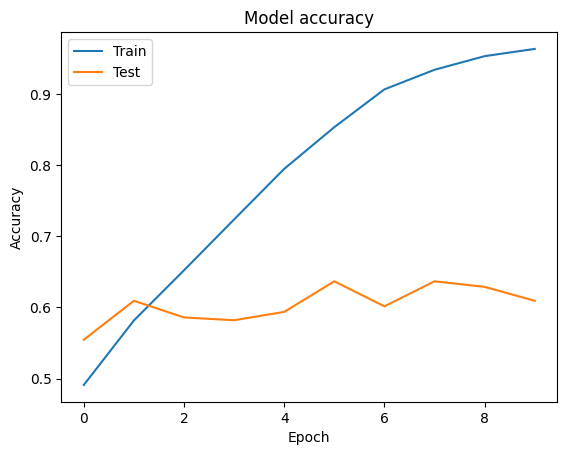

In [60]:
import matplotlib.pyplot as plt

plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [48]:
model_parallel.save('model_parallel.h5')

In [50]:
from keras.models import load_model
model=load_model('model_parallel.h5')
model.compile(optimizer=Adam(lr=1e-05),loss=categorical_crossentropy,metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_validation,y_val))

Epoch 1/10


c:\Users\arora\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


52/52 [==============================] - 100s 2s/step - loss: 3.3798 - accuracy: 0.9744 - val_loss: 4.2064 - val_accuracy: 0.6641
Epoch 2/10
52/52 [==============================] - 99s 2s/step - loss: 3.3414 - accuracy: 0.9762 - val_loss: 4.1606 - val_accuracy: 0.6562
Epoch 3/10
52/52 [==============================] - 97s 2s/step - loss: 3.2993 - accuracy: 0.9797 - val_loss: 4.1821 - val_accuracy: 0.6602
Epoch 4/10
52/52 [==============================] - 99s 2s/step - loss: 3.2615 - accuracy: 0.9772 - val_loss: 4.1738 - val_accuracy: 0.6484
Epoch 5/10
52/52 [==============================] - 98s 2s/step - loss: 3.2224 - accuracy: 0.9779 - val_loss: 4.0644 - val_accuracy: 0.6445
Epoch 6/10
52/52 [==============================] - 100s 2s/step - loss: 3.1853 - accuracy: 0.9787 - val_loss: 4.0274 - val_accuracy: 0.6758
Epoch 7/10
52/52 [==============================] - 98s 2s/step - loss: 3.1455 - accuracy: 0.9820 - val_loss: 3.9992 - val_accuracy: 0.6602
Epoch 8/10
52/52 [===========

In [ ]:
from sklearn.model_selection import KFold
from keras.models import load_model
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

kf=KFold(n_splits=5,shuffle=True,random_state=42)
kf.get_n_splits(X)

y=to_categorical(Y)
accs=[]

for train_index,test_index in kf.split(X):
    
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    # model=load_model('model.h5')
    
    model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))
    
    model.save('model_5_CV.h5')
    
    accs.append(model.evaluate(X_test,y_test)[1])
print(f'Accuracy after 5-Fold CV: {np.mean(accs)}')

In [ ]:
model.save('model.h5')